# Загрузка данных

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder

In [2]:
# Читаем набор данных
df = pd.read_csv('real_estate_data.csv', low_memory=False, index_col='id')

### Читаем данные

In [3]:
df.head(10)

,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,furnished,heating_type,price,price_currency
id,,,,,,,,,,,,,,,,
1,Konut,Rezidans,12/10/18,1/9/19,2,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,3500.0,TRY
2,Konut,Daire,2/13/19,NaN,1,14,0,20 ve üzeri,20 ve üzeri,1+0,43.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,490000.0,TRY
3,Konut,Daire,10/9/18,11/8/18,1,30,0,1,Yüksek Giriş,2+1,NaN,Tekirdağ/Çorlu/Reşadiye,NaN,Fancoil,155000.0,TRY
4,Konut,Rezidans,9/10/18,10/10/18,1,30,3,20 ve üzeri,20 ve üzeri,6+1,450.0,İstanbul/Beşiktaş/Levent,NaN,Fancoil,32500000.0,TRY
5,Konut,Rezidans,12/10/18,1/9/19,1,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,1450000.0,TRY
6,Konut,Rezidans,11/9/18,12/9/18,1,30,2,10-20 arası,10,1+1,45.0,İstanbul/Maltepe/Altayçeşme,NaN,Fancoil,780000.0,TRY
7,Konut,Daire,1/4/19,NaN,2,54,0,20 ve üzeri,14,3+1,160.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,3750.0,TRY
8,Konut,Villa,10/3/18,1/3/19,1,92,0,4,NaN,4+1,NaN,İzmir/Urla/M. Fevzi Çakmak,NaN,Fancoil,1500000.0,TRY
9,Konut,Daire,2/16/19,NaN,1,11,NaN,2,Kot 2,3+1,140.0,Çanakkale/Ayvacık/Küçükkuyu Bld. (Mıhlı),NaN,Fancoil,1500000.0,TRY


In [4]:
df.describe()

,listing_type,tom,size,furnished,price
count,403487.000000,403487.000000,257481.000000,0.0,4.027720e+05
mean,1.294235,57.022739,279.349094,NaN,3.546417e+05
std,0.467733,44.358933,9429.195331,NaN,4.809503e+06
min,1.000000,0.000000,1.000000,NaN,-2.500000e+02
25%,1.000000,29.000000,85.000000,NaN,2.500000e+03
50%,1.000000,40.000000,110.000000,NaN,1.990000e+05
75%,2.000000,90.000000,140.000000,NaN,3.420000e+05
max,3.000000,180.000000,948235.000000,NaN,2.000000e+09


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403487 entries, 1 to 403487
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   type               403487 non-null  object 
 1   sub_type           403487 non-null  object 
 2   start_date         403487 non-null  object 
 3   end_date           266298 non-null  object 
 4   listing_type       403487 non-null  int64  
 5   tom                403487 non-null  int64  
 6   building_age       376097 non-null  object 
 7   total_floor_count  375466 non-null  object 
 8   floor_no           368191 non-null  object 
 9   room_count         403487 non-null  object 
 10  size               257481 non-null  float64
 11  address            403487 non-null  object 
 12  furnished          0 non-null       float64
 13  heating_type       375517 non-null  object 
 14  price              402772 non-null  float64
 15  price_currency     402772 non-null  object 
dtypes:

### Просмотр пустых значений

In [6]:
df.isnull().sum()

type                      0
sub_type                  0
start_date                0
end_date             137189
listing_type              0
tom                       0
building_age          27390
total_floor_count     28021
floor_no              35296
room_count                0
size                 146006
address                   0
furnished            403487
heating_type          27970
price                   715
price_currency          715
dtype: int64

In [7]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

type - 0%
sub_type - 0%
start_date - 0%
end_date - 34%
listing_type - 0%
tom - 0%
building_age - 7%
total_floor_count - 7%
floor_no - 9%
room_count - 0%
size - 36%
address - 0%
furnished - 100%
heating_type - 7%
price - 0%
price_currency - 0%


### Заменим пустые значения

In [8]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values

for col in numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for (median): {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        med = df[col].median()
        df[col] = df[col].fillna(med)
        
        
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values


for col in non_numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for (mode): {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        
        top = df[col].mode()[0]
        df[col] = df[col].fillna(top)
        
        
# for col in non_numeric_cols:
#     missing = df[col].isnull()
#     num_missing = np.sum(missing)
    
#     if num_missing > 0:  # only do the imputation for the columns that have missing values.
#         print('imputing missing values for: {}'.format(col))
#         df['{}_ismissing'.format(col)] = missing
        
#         top = df[col].describe()['top'] # impute with the most frequent value.
#         df[col] = df[col].fillna(top)

imputing missing values for (median): size
imputing missing values for (median): furnished
imputing missing values for (median): price
imputing missing values for (mode): end_date
imputing missing values for (mode): building_age
imputing missing values for (mode): total_floor_count
imputing missing values for (mode): floor_no
imputing missing values for (mode): heating_type
imputing missing values for (mode): price_currency


In [9]:
# df.end_date = df.end_date.fillna('__MISSING__')
# df.building_age = df.building_age.fillna('__MISSING__') 
# df.floor_no = df.floor_no.fillna('__MISSING__') 
# df.total_floor_count = df.total_floor_count.fillna('__MISSING__') 
# df.heating_type = df.heating_type.fillna(df.heating_type.mode()[0])
# df.price_currency = df.price_currency.fillna(df.heating_type.mode()[0])


In [10]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*1000)))

type - 0%
sub_type - 0%
start_date - 0%
end_date - 0%
listing_type - 0%
tom - 0%
building_age - 0%
total_floor_count - 0%
floor_no - 0%
room_count - 0%
size - 0%
address - 0%
furnished - 1000%
heating_type - 0%
price - 0%
price_currency - 0%
size_ismissing - 0%
furnished_ismissing - 0%
price_ismissing - 0%
end_date_ismissing - 0%
building_age_ismissing - 0%
total_floor_count_ismissing - 0%
floor_no_ismissing - 0%
heating_type_ismissing - 0%
price_currency_ismissing - 0%


### Разделим столбцы

In [11]:
df.head(10)

,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,...,price_currency,size_ismissing,furnished_ismissing,price_ismissing,end_date_ismissing,building_age_ismissing,total_floor_count_ismissing,floor_no_ismissing,heating_type_ismissing,price_currency_ismissing
id,,,,,,,,,,,,,,,,,,,,,
1,Konut,Rezidans,12/10/18,1/9/19,2,30,0,20 ve üzeri,2,2+1,...,TRY,False,True,False,False,False,False,False,False,False
2,Konut,Daire,2/13/19,12/19/18,1,14,0,20 ve üzeri,20 ve üzeri,1+0,...,TRY,False,True,False,True,False,False,False,False,False
3,Konut,Daire,10/9/18,11/8/18,1,30,0,1,Yüksek Giriş,2+1,...,TRY,True,True,False,False,False,False,False,False,False
4,Konut,Rezidans,9/10/18,10/10/18,1,30,3,20 ve üzeri,20 ve üzeri,6+1,...,TRY,False,True,False,False,False,False,False,False,False
5,Konut,Rezidans,12/10/18,1/9/19,1,30,0,20 ve üzeri,2,2+1,...,TRY,False,True,False,False,False,False,False,False,False
6,Konut,Rezidans,11/9/18,12/9/18,1,30,2,10-20 arası,10,1+1,...,TRY,False,True,False,False,False,False,False,False,False
7,Konut,Daire,1/4/19,12/19/18,2,54,0,20 ve üzeri,14,3+1,...,TRY,False,True,False,True,False,False,False,False,False
8,Konut,Villa,10/3/18,1/3/19,1,92,0,4,2,4+1,...,TRY,True,True,False,False,False,False,True,False,False
9,Konut,Daire,2/16/19,12/19/18,1,11,0,2,Kot 2,3+1,...,TRY,False,True,False,True,True,False,False,False,False


1. Разделяем столбец комнаты на жилые и не жилые

In [12]:
df[['rooms', 'living_rooms']] = df['room_count'].str.split('+', expand=True)

df['rooms'] = [1 if len(item) == 0 else item for item in df['rooms']]
df['living_rooms'] = [1 if len(item) == 0 else item for item in df['living_rooms']]

2. Разделим адрес

In [13]:
df[['city', 'country', 'district']] = df['address'].str.split('/', expand=True)

### Кодируем категориальные признки

In [14]:
ordinal_encoder = OrdinalEncoder()  # Объект

0. Building_age

In [15]:
df['building_age_c'] = ordinal_encoder.fit_transform(df[['building_age_ismissing']])

BUILDING_AGE_CODE_DICT = dict(zip((ordinal_encoder.categories_[0]), range(len(ordinal_encoder.categories_[0]))))

1. Sub_type

In [18]:
df['sub_type_c'] = ordinal_encoder.fit_transform(df[['sub_type']])

SUB_TYPE_CODE_DICT = dict(zip((ordinal_encoder.categories_[0]), range(len(ordinal_encoder.categories_[0]))))

2. Total_floor_count

In [19]:
df['total_floor_count_c'] = ordinal_encoder.fit_transform(df[['total_floor_count_ismissing']])

TOTAL_FLOOR_COUNT_CODE_DICT = dict(zip((ordinal_encoder.categories_[0]), range(len(ordinal_encoder.categories_[0]))))

3. floor_no

In [20]:
df['floor_no_c'] = ordinal_encoder.fit_transform(df[['floor_no_ismissing']])

FLOOR_NO_CODE_DICT = dict(zip((ordinal_encoder.categories_[0]), range(len(ordinal_encoder.categories_[0]))))

4. heating_type

In [21]:
df['heating_type_c'] = ordinal_encoder.fit_transform(df[['heating_type_ismissing']])

HEATING_TYPE_CODE_DICT = dict(zip((ordinal_encoder.categories_[0]), range(len(ordinal_encoder.categories_[0]))))

5. price_currency

In [22]:
df['price_currency_c'] = ordinal_encoder.fit_transform(df[['price_currency_ismissing']])

PRICE_CURRENCY_CODE_DICT = dict(zip((ordinal_encoder.categories_[0]), range(len(ordinal_encoder.categories_[0]))))

6. city

In [24]:
df['city_c'] = ordinal_encoder.fit_transform(df[['city']])

CITY_CODE_DICT = dict(zip((ordinal_encoder.categories_[0]), range(len(ordinal_encoder.categories_[0]))))

7. country

In [26]:
df['country_c'] = ordinal_encoder.fit_transform(df[['country']])

COUNRTY_CODE_DICT = dict(zip((ordinal_encoder.categories_[0]), range(len(ordinal_encoder.categories_[0]))))

7. district

In [27]:
df['district_c'] = ordinal_encoder.fit_transform(df[['district']])

COUNRTY_CODE_DICT = dict(zip((ordinal_encoder.categories_[0]), range(len(ordinal_encoder.categories_[0]))))

### Удалим не нужные столбцы

In [28]:
df = df.drop(['furnished', 'type', 'room_count', 'address'], axis=1)

### Удалим дубликаты

In [29]:
print(df.shape)

df = df.drop_duplicates()

print(df.shape)

# df.columns = df.columns.str.replace(' ', '')

(403487, 35)
(391928, 35)


### Добавим закодированные столбцы в чистый датафрейм

In [30]:
# Чистый датафрейм
df_clear = pd.DataFrame()

In [31]:
df_clear['SubType'] = df.sub_type_c
df_clear['BuildingAge'] = df.building_age_c
df_clear['ListingType'] = df.listing_type
df_clear['Tom'] = df.tom
df_clear['Price'] = df.price
df_clear['Rooms'] = df.rooms
df_clear['LivingRooms'] = df.living_rooms
df_clear['City'] = df.city_c
df_clear['Country'] = df.country_c
df_clear['District'] = df.district_c
df_clear['TotalFloorCount'] = df.total_floor_count_c
df_clear['FloorNo'] = df.floor_no_c
df_clear['HeatingType'] = df.heating_type_c
df_clear['PriceCurrency'] = df.price_currency_c

In [32]:
df_clear.head()

,SubType,BuildingAge,ListingType,Tom,Price,Rooms,LivingRooms,City,Country,District,TotalFloorCount,FloorNo,HeatingType,PriceCurrency
id,,,,,,,,,,,,,,
1,7.0,0.0,2,30,3500.0,2,1,78.0,249.0,2447.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1,14,490000.0,1,0,78.0,249.0,2447.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1,30,155000.0,2,1,66.0,488.0,3254.0,0.0,0.0,0.0,0.0
4,7.0,0.0,1,30,32500000.0,6,1,78.0,88.0,2747.0,0.0,0.0,0.0,0.0
5,7.0,0.0,1,30,1450000.0,2,1,78.0,249.0,2447.0,0.0,0.0,0.0,0.0


# Визуализация данных

Гистограмма типа здания

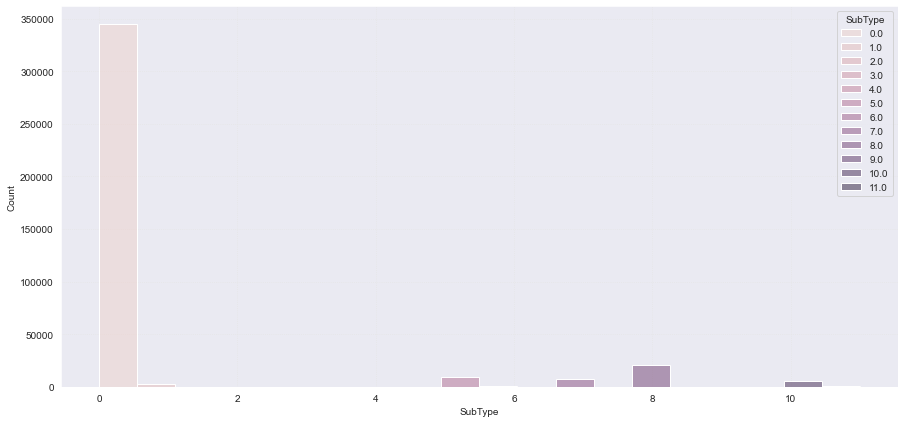

In [33]:
plt.figure(figsize=(15, 7))
sns.set_style("darkgrid", {"grid.color": ".9", "grid.linestyle": ":"})
sns.histplot(data=df_clear, x=df_clear.SubType, hue='SubType')
plt.show()

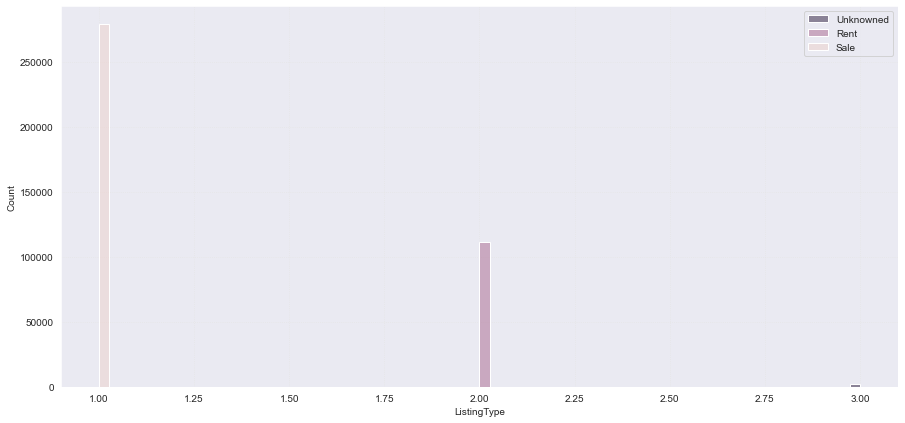

In [34]:
plt.figure(figsize=(15, 7))
sns.histplot(data=df_clear, x=df_clear.ListingType, hue='ListingType', legend=False)
plt.legend(['Unknowned', 'Rent', 'Sale'])
plt.show()

<AxesSubplot:>

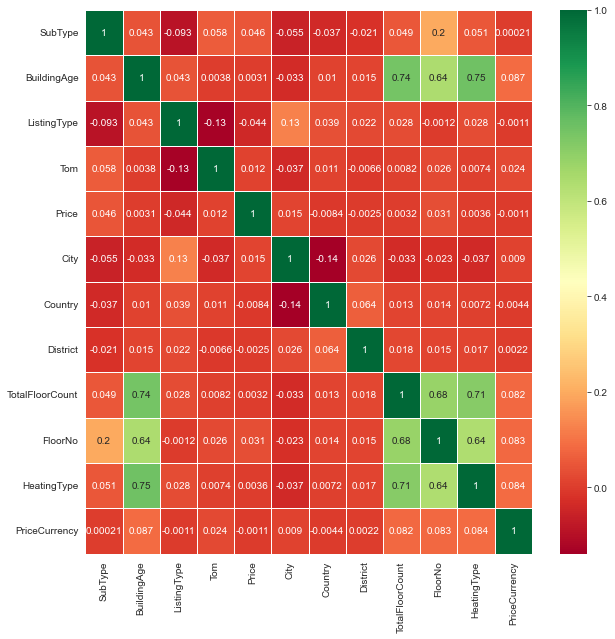

In [35]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_clear.corr(), cmap='RdYlGn', annot=True, linewidths=1)

In [45]:
from sklearn.model_selection import train_test_split


target_c = ['BuildingAge']
column_train = ['FloorNo', 'Country', 'District', 'Price', 'HeatingType', 'SubType', 'Price']

X, Y = df_clear[column_train], df_clear[target_c]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=33)

In [ ]:
from sklearn.svm import SVC

# Обучение
premodel = SVC(random_state=2)
premodel.fit(X_train, Y_train)
premodel.score(X_test, Y_test)
# premodel.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [46]:
from sklearn.tree import DecisionTreeClassifier

premodel = DecisionTreeClassifier(random_state=1)
premodel.fit(X_train, Y_train)
premodel.score(X_test, Y_test)


0.9729389115257042

In [47]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier().fit(X_train, Y_train)
model_knn.score(X_test, Y_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9330199401563358

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 

model_rfc = RandomForestClassifier().fit(X_train, Y_train) 
model_rfc.score(X_test, Y_test)

C:\USERSP~1\is119belyh\AppData\Local\Temp/ipykernel_5128/1006259078.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rfc = RandomForestClassifier().fit(X_train, Y_train)


0.9799052088729443